In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
data=pd.read_csv('Tesla_stock_Price.csv')

In [ ]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3258 non-null   object 
 1   Price   3178 non-null   float64
 2   Open    3178 non-null   float64
 3   High    3178 non-null   float64
 4   Low     3178 non-null   object 
 5   Volume  3178 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(3), object(4)
memory usage: 178.3+ KB


In [ ]:
data.isnull().sum()

,0
Date,0
Price,80
Open,80
High,80
Low,80
Volume,80
Chg%,120


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

<ipython-input-9-54a1eaf80efb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'])


In [ ]:
data=data.sort_values('Date')

In [ ]:
data=data.set_index('Date')

In [ ]:
data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-06-30,1.59,1.72,2.03,1.55,257.92M,0.00%
2010-07-01,1.46,1.67,1.73,1.35,123.45M,-8.18%
2010-07-02,1.28,1.53,1.54,1.25,77.13M,-12.33%
2010-07-06,1.07,1.33,1.33,1.06,103.19M,-16.41%
2010-07-07,1.05,1.09,1.11,1,103.87M,-1.87%


In [ ]:
data.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

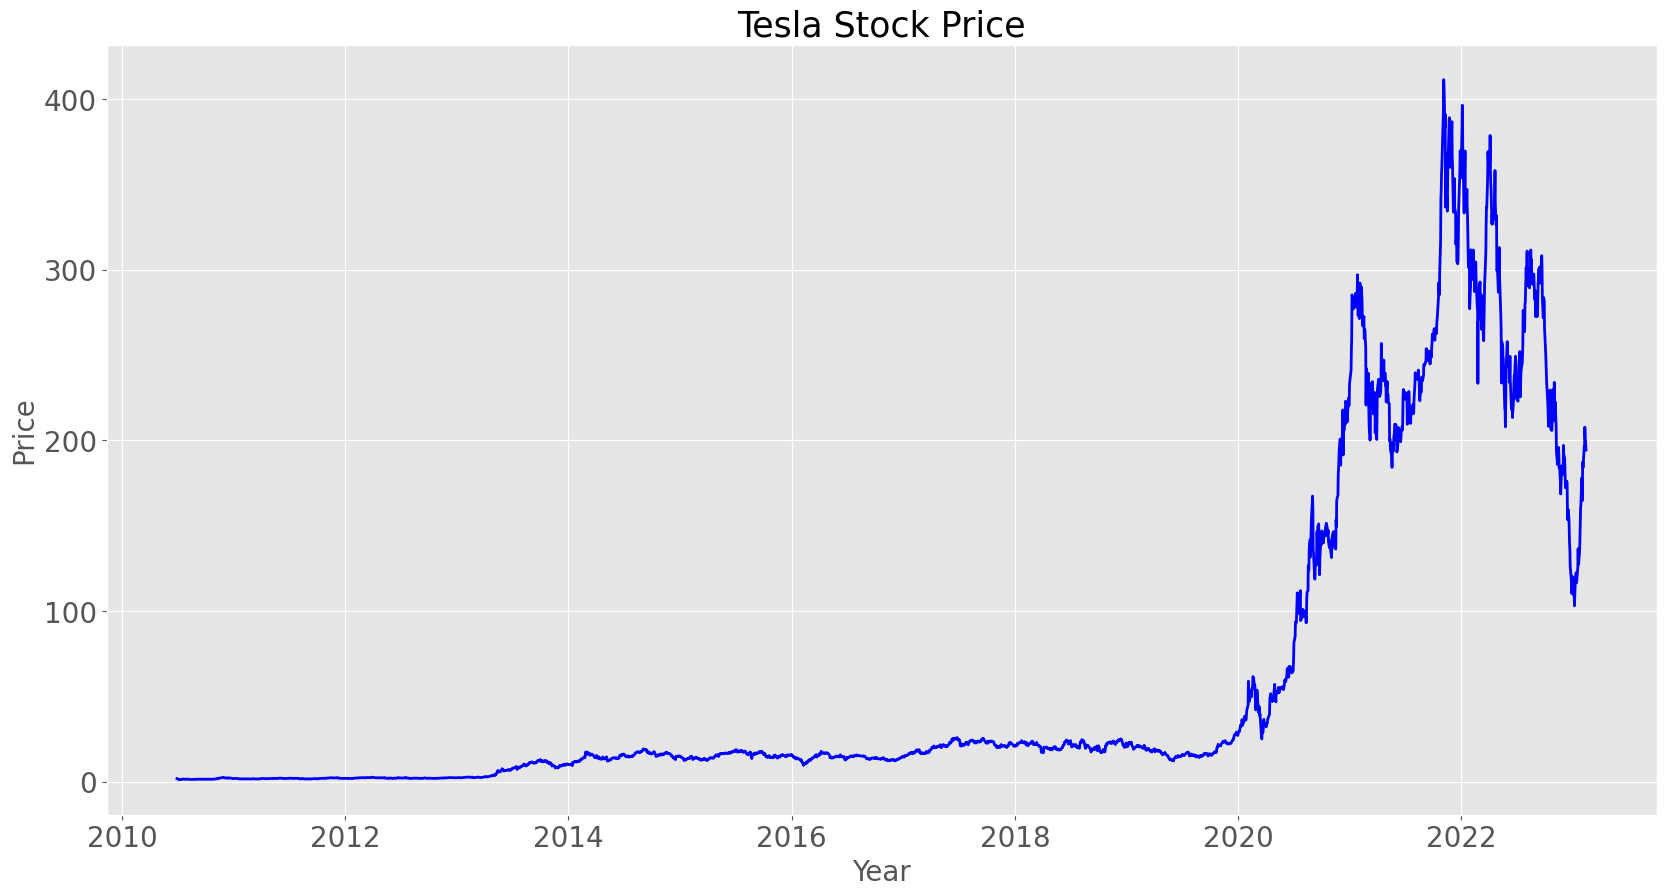

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.plot(data['Open'],linewidth=2, color='b' )
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title("Tesla Stock Price", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


<Axes: xlabel='Open', ylabel='Density'>

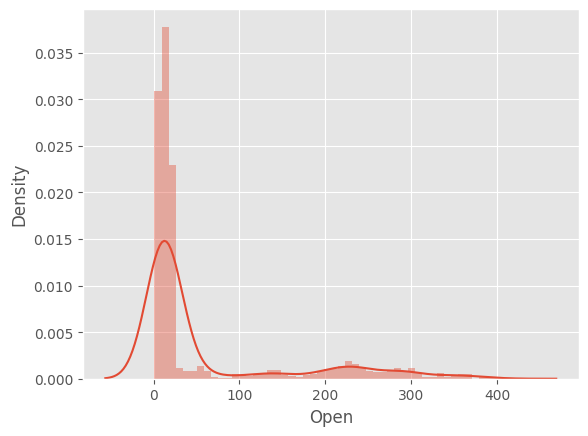

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(data['Open'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

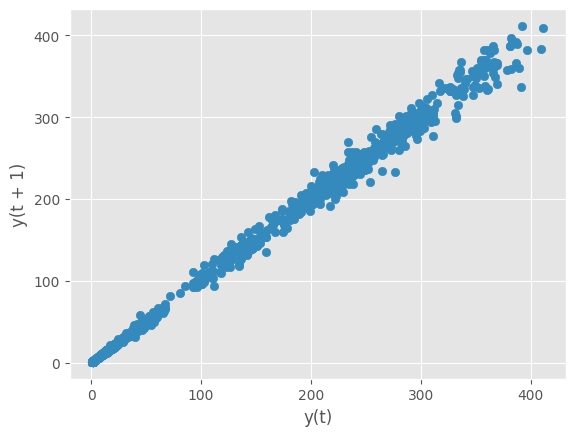

In [ ]:
from pandas.plotting import lag_plot
lag_plot(data['Open'], lag=1)

In [ ]:
# Dickry Fuller Test, Checking  for Stationationarity of the Timeseries data

def test_stationarity(timeseries):
    rolmean=timeseries.rolling(30).mean()
    rolstd=timeseries.rolling(30).std()

    plt.figure(figsize=(20,10))
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Original', linewidth=2)
    plt.plot(rolstd, color='black', label='Original', linewidth=4)
    plt.plot(loc='best', fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
    plt.title('Rolling Mean and Standard Devaiation', fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show(block=False)

    print('Result of Dickey Fuller Test')
    adft=adfuller(timeseries, autolag='AIC')

    output=pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of Lags', 'Number of Observations Used'])

    for key, values in adft[4].items():
        output['Critical Value (%s)'%key]=values
    print(output)


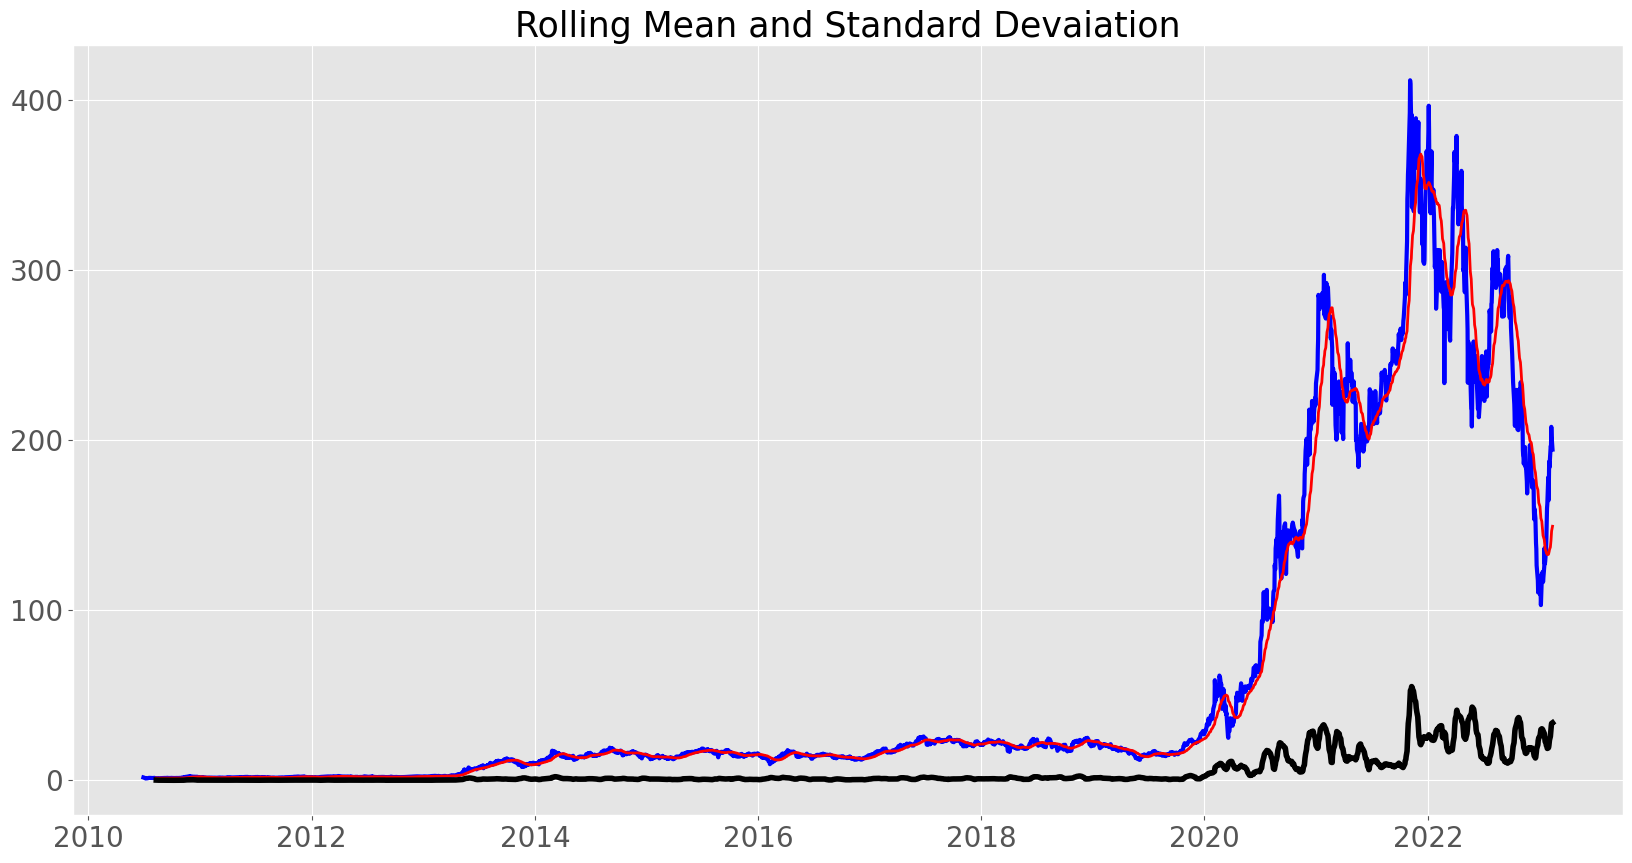

Result of Dickey Fuller Test
Test Statistics                  -1.119487
p-value                           0.707238
No. of Lags                      25.000000
Number of Observations Used    3112.000000
Critical Value (1%)              -3.432453
Critical Value (5%)              -2.862469
Critical Value (10%)             -2.567265
dtype: float64


In [ ]:
test_stationarity(data['Open'])

For a Time series to be stationary, its ADCF test should have:

1. p-value to be low (according to the null hypothesis)
1. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

In [ ]:
# Statinarising the TimeSeries using differencing

df_open=data['Open'].diff()
df_open=df_open.dropna()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

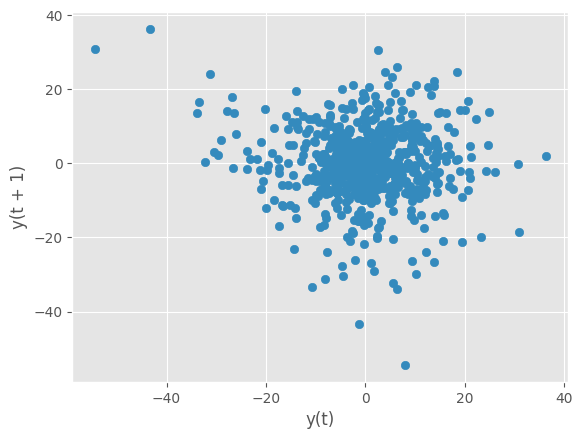

In [ ]:
lag_plot(df_open, lag=1)

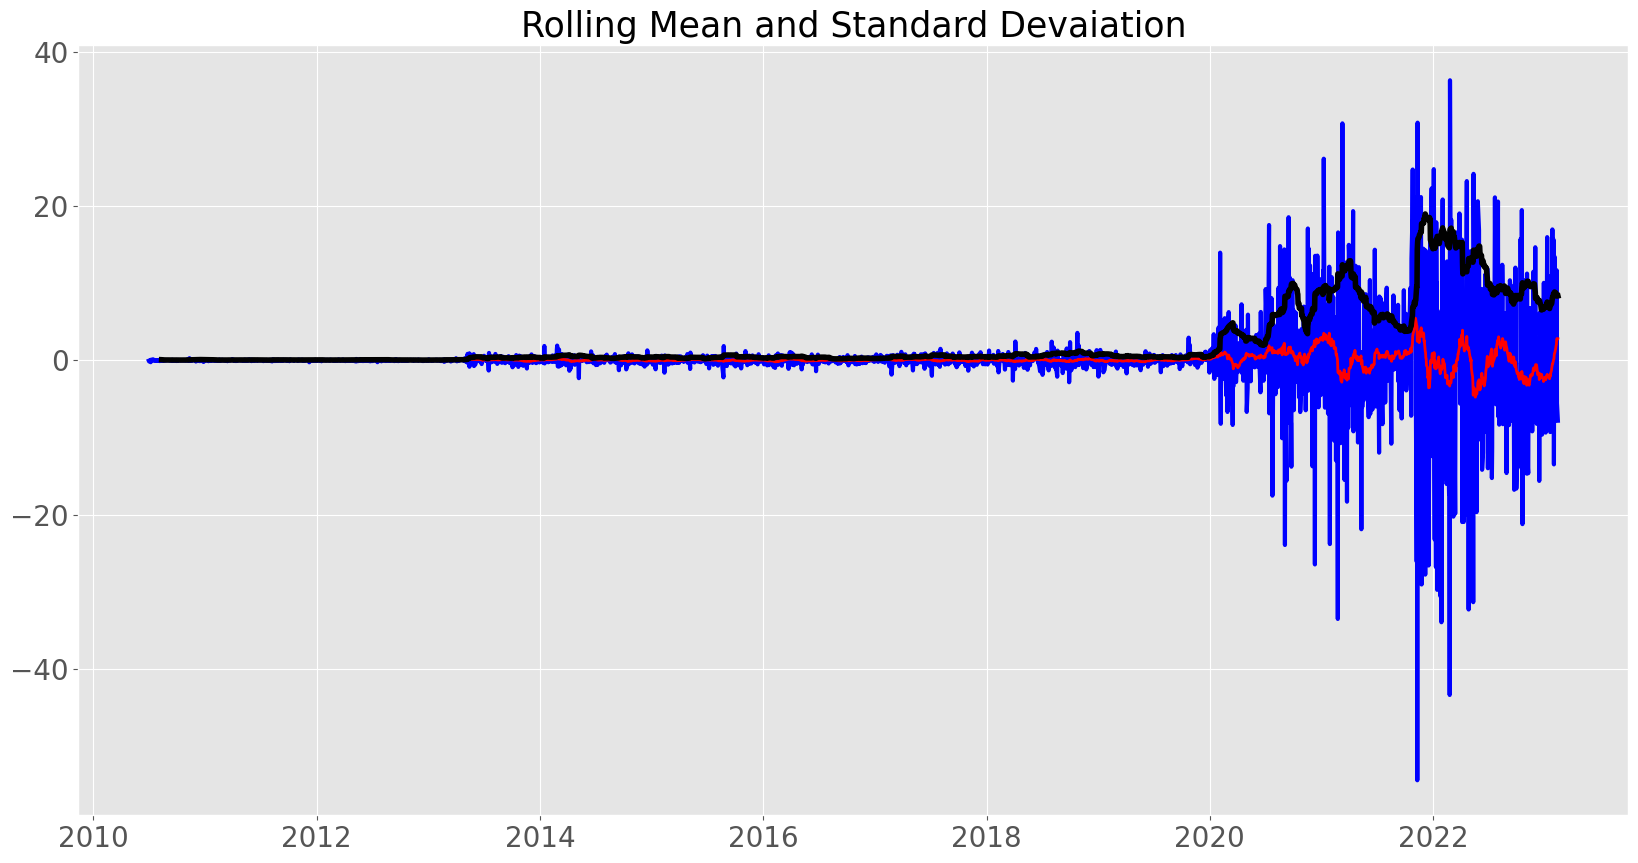

Result of Dickey Fuller Test
Test Statistics               -1.063293e+01
p-value                        5.158782e-19
No. of Lags                    2.400000e+01
Number of Observations Used    3.112000e+03
Critical Value (1%)           -3.432453e+00
Critical Value (5%)           -2.862469e+00
Critical Value (10%)          -2.567265e+00
dtype: float64


In [ ]:
test_stationarity(df_open)

In [ ]:
# We have made the data stationary, Now checking for Trend, Seasonality, Residual

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

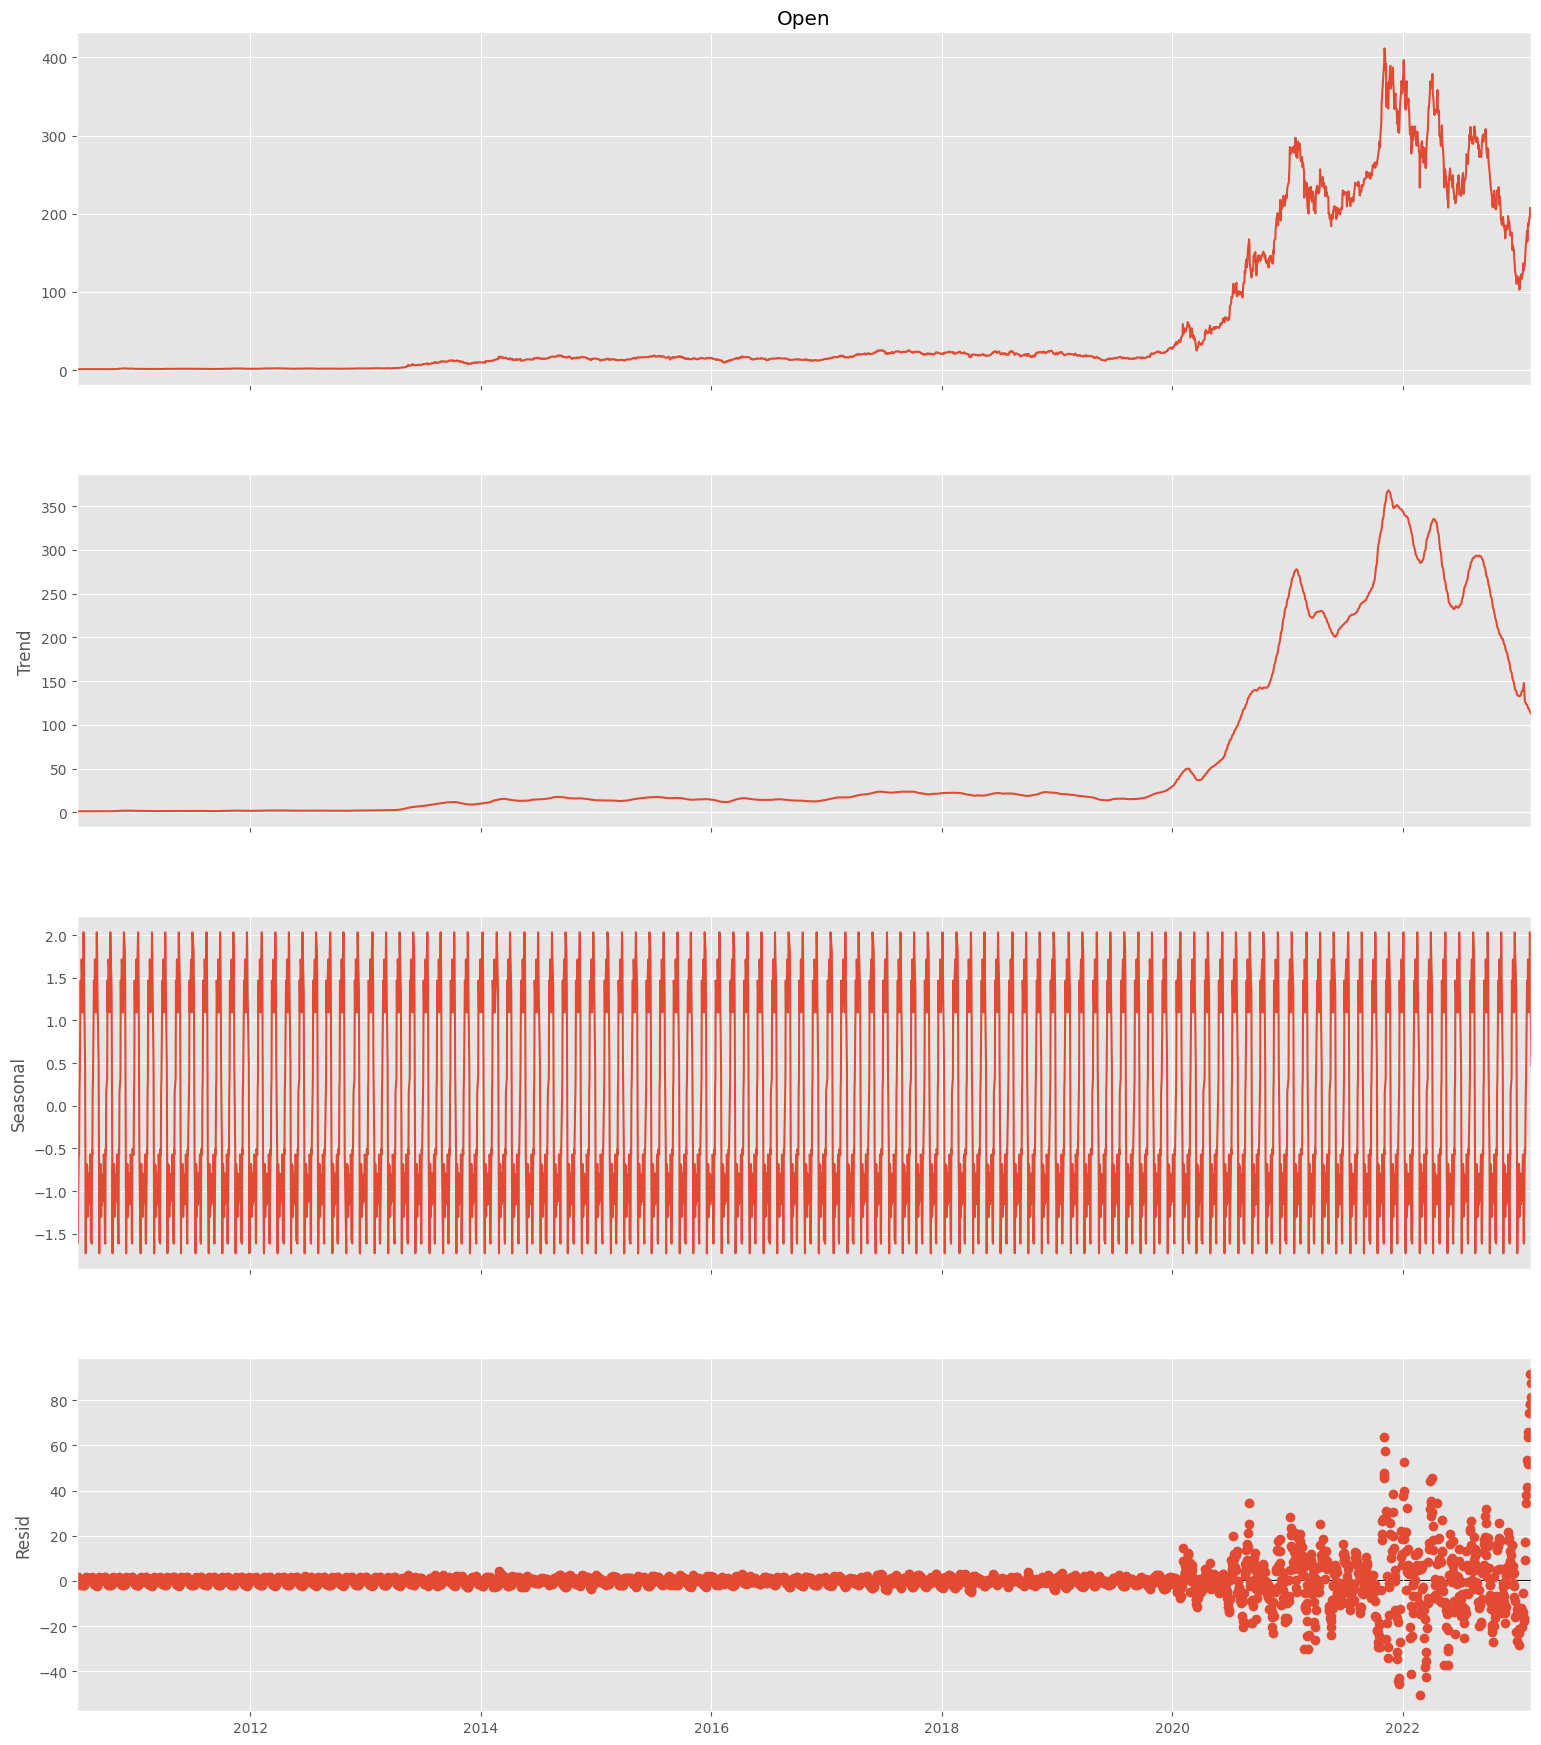

In [ ]:
result = seasonal_decompose(data["Open"], model='additive', extrapolate_trend='freq', period=30)
# fig=plt.figure(figsize=(20,20))
fig=result.plot()
fig.set_size_inches(17,20)

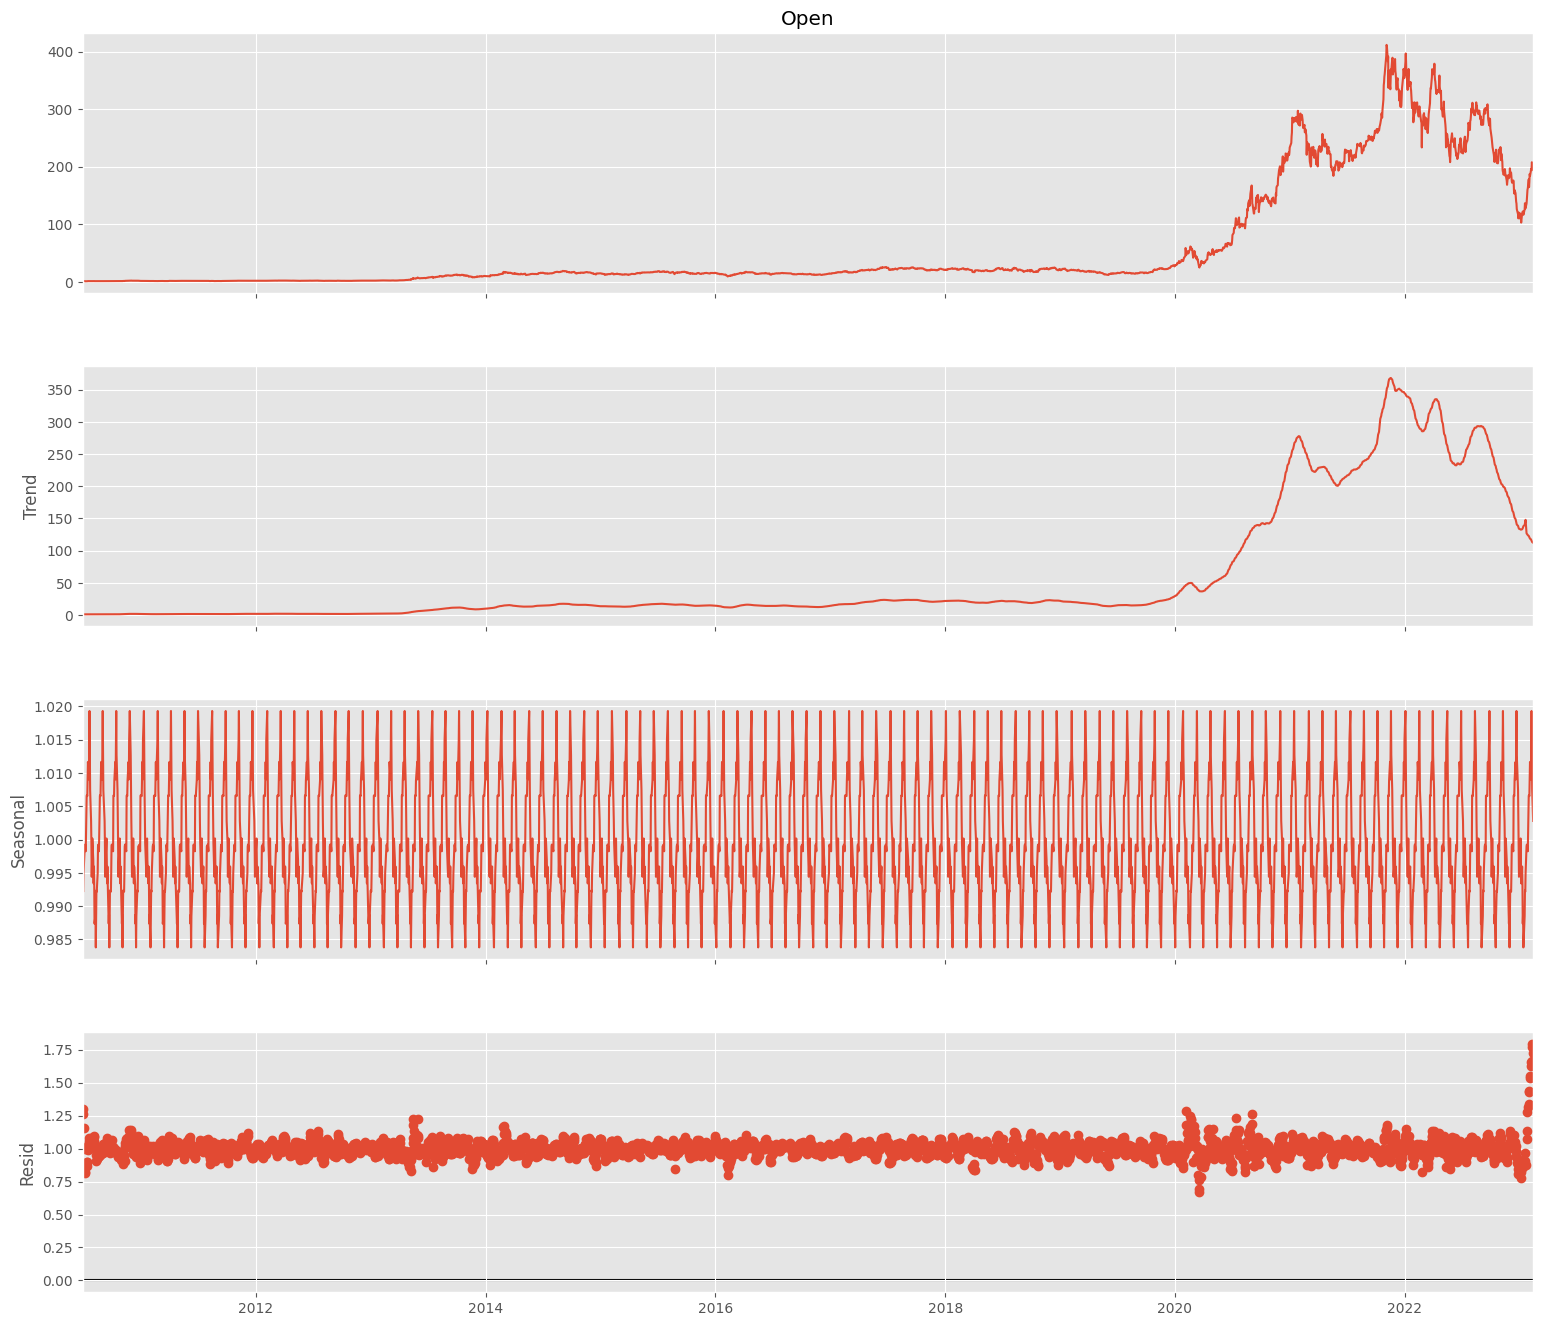

In [ ]:
result1 = seasonal_decompose(data["Open"], model='multiplicative', extrapolate_trend='freq', period=30)
# fig=plt.figure(figsize=(20,20))
fig=result1.plot()
fig.set_size_inches(17,15)

In [ ]:
# Dividing the Data in to train and test data
train_df=data['Open'][:-400]
test_df=data['Open'][-400:]

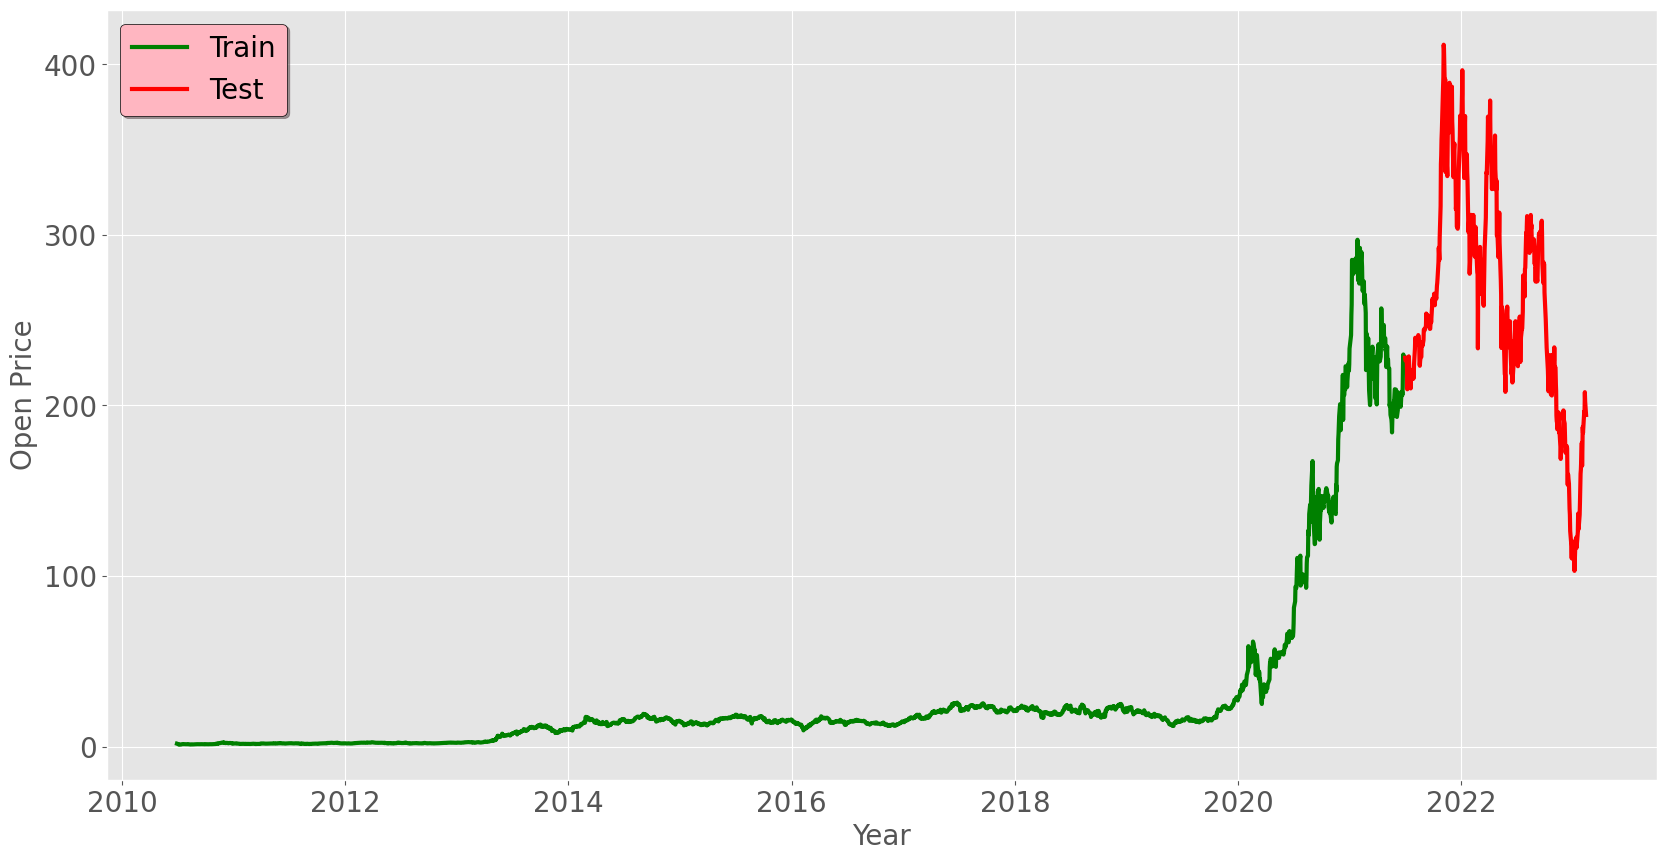

In [ ]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Open Price',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(train_df, 'green', linewidth=3, label='Train')
plt.plot(test_df, 'red',  linewidth=3, label='Test')
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')


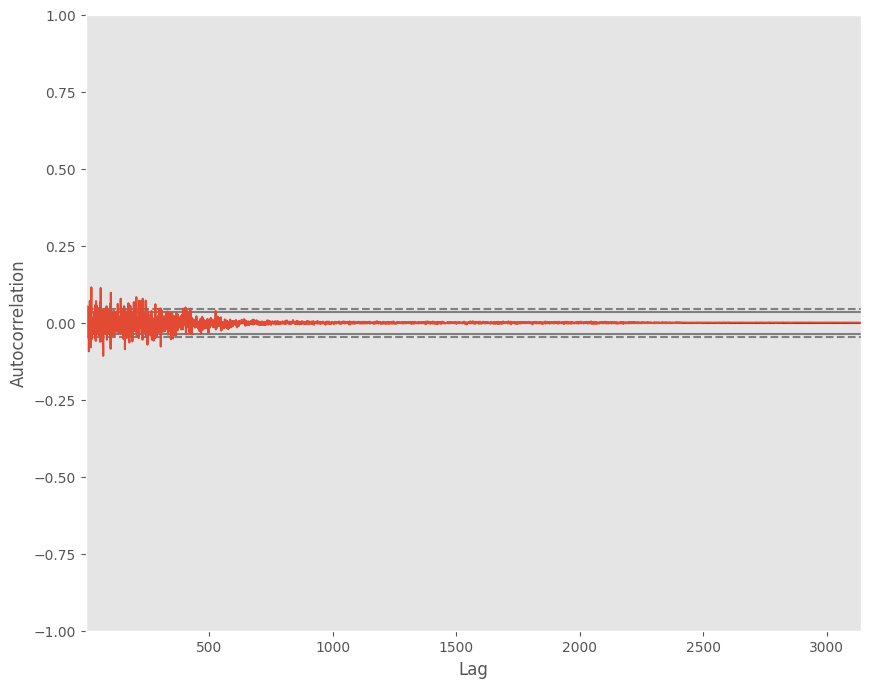

In [ ]:
# Checking for Autocorrelation Function and Partial Autocorrelation function

from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,8))
autocorrelation_plot(df_open)
plt.show()

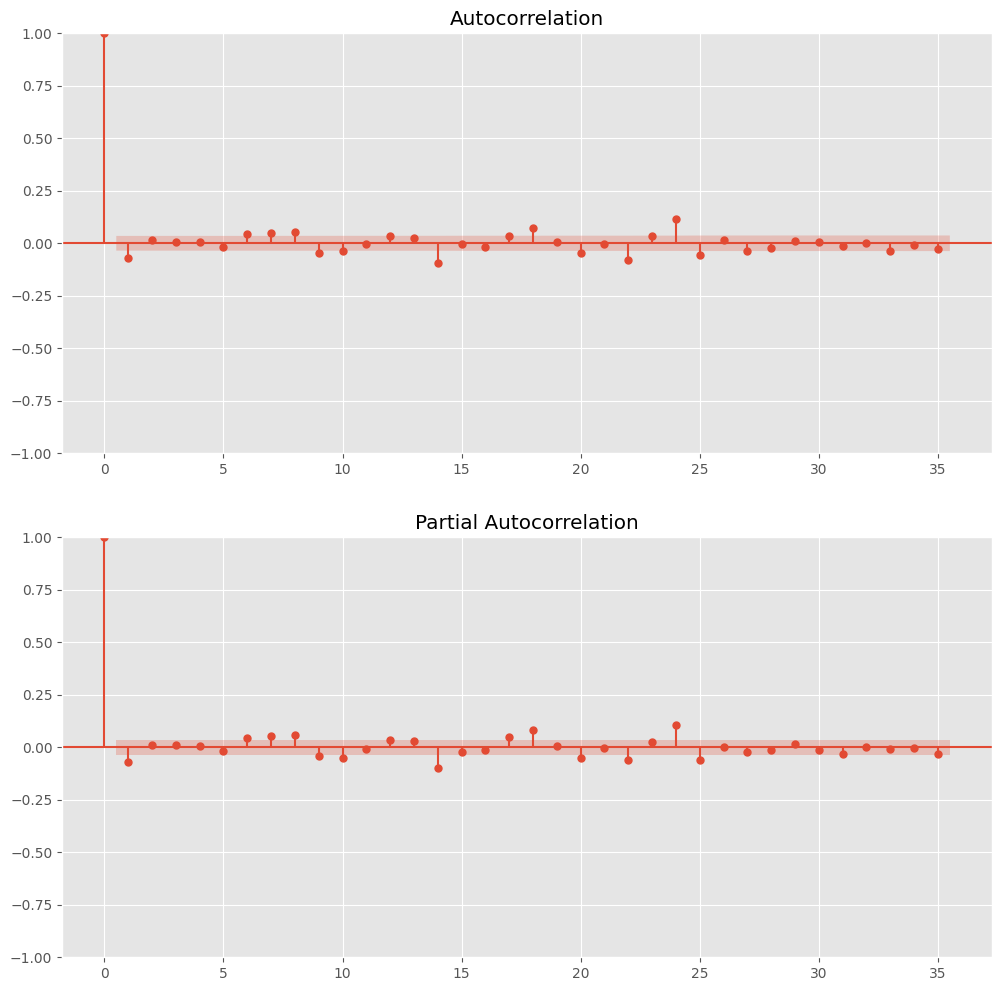

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(df_open, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_open, ax=ax2)

In [ ]:
!pip install statsmodels


In [ ]:

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [ ]:
# Define the ARIMA model with appropriate (p, d, q) values
model = ARIMA(train_df, order=(1, 1, 1))  # Adjust (p, d, q) values based on your data analysis

# Fit the model to your training data
model_fit = model.fit()

# Display the summary of the fitted model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2738
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6535.334
Date:                Thu, 24 Apr 2025   AIC                          13076.667
Time:                        19:45:43   BIC                          13094.411
Sample:                             0   HQIC                         13083.079
                               - 2738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3126      0.056      5.597      0.000       0.203       0.422
ma.L1         -0.3987      0.053     -7.503      0.000      -0.503      -0.295
sigma2         6.9424      0.041    170.067      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_df, order=(3,1,0))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2738
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -6524.140
Date:                Thu, 24 Apr 2025   AIC                          13056.280
Time:                        19:46:50   BIC                          13079.938
Sample:                             0   HQIC                         13064.829
                               - 2738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0715      0.006    -11.190      0.000      -0.084      -0.059
ar.L2         -0.0911      0.006    -15.156      0.000      -0.103      -0.079
ar.L3          0.0495      0.007      7.381      0.0

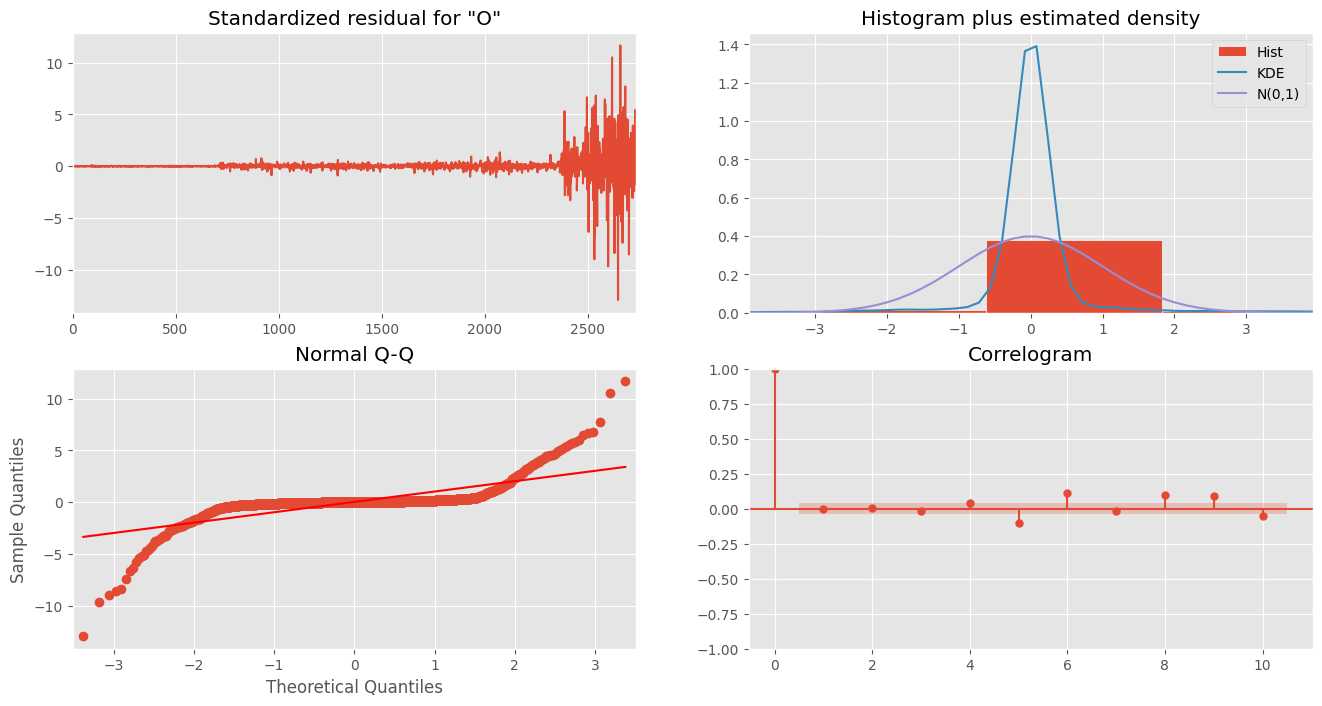

In [ ]:
model_fit.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

<Figure size 2000x500 with 0 Axes>

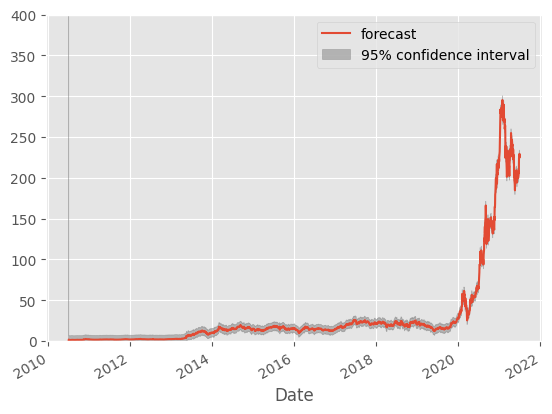

In [ ]:
plt.figure(figsize=(20,5))
plot_predict(model_fit)
plt.ylim(0,400)
plt.show()

In [ ]:
# Forecast values for the test set
forecast = model_fit.forecast(steps=len(test_df))  # Replace 'test_df' with your actual test data


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Actual values from the test set
actual = test_df.values

# RMSE
rmse = np.sqrt(mean_squared_error(actual, forecast))
print(f"RMSE: {rmse}")

# MAE
mae = mean_absolute_error(actual, forecast)
print(f"MAE: {mae}")

# R² Score
r2 = r2_score(actual, forecast)
print(f"R² Score: {r2}")


RMSE: 74.80734226490708
MAE: 59.51264337047734
R² Score: -0.309223845370465
